## Solutions

1. What is the fundamental idea behind support vector machines?

> Find a decision boundary that  maximises the margins.


2. What is a support vector?

> Support vectors are data points that supports the margins.

3. Why is it important to scale the inputs when using SVMs?

>Unscaled datasets can not identify optimal decision bounary and reduces the width of the margin.

> if features are on very different scales, features with larger numeric ranges can dominate the optimization of the margin. Scaling ensures that each feature contributes more equally, helping the algorithm converge faster and more reliably.

4. Can an SVM classifier output a confidence score when it classifies an instance? What about the probability?

>The SVM classifier outputs the confidence score but not the probability.

> Standard SVM outputs a “decision function” value (distance from the hyperplane), which can be treated as a sort of confidence measure. But it does not natively produce a true probability.

5. How can you choose between LinearSVC, SVC, SGDClassifier?

   
>LinearSVC can only produce linear boundaries as it doesnot support linear trick.

>SVC supports the kernal trick and therefore can be used with datasets that are not linearly seperable.

>SGDClassifier is used when our datasets is large.

6. Say you've trained a SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease $\gamma$? what about C?

   
>I would increase the value of $\gamma$ and C.

7. What does it mean for a model to be $\epsilon\text{-insensitive}$?

   
>When $\epsilon$ is reduced, the margin gets smaller and the number of support vectors increases. When a large number of support vectors are supporting the margins and more data points are added within the   margin  then it is called $\epsilon\text{-insensitive}$.


8. What is the point of using kernal-trick?

    
>It reduces computationalal complexity. A kernal function allows us to get result of a dot product beween higher dimention vectors without having to expand or transfrom the vectors into that dimention.




In [32]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score

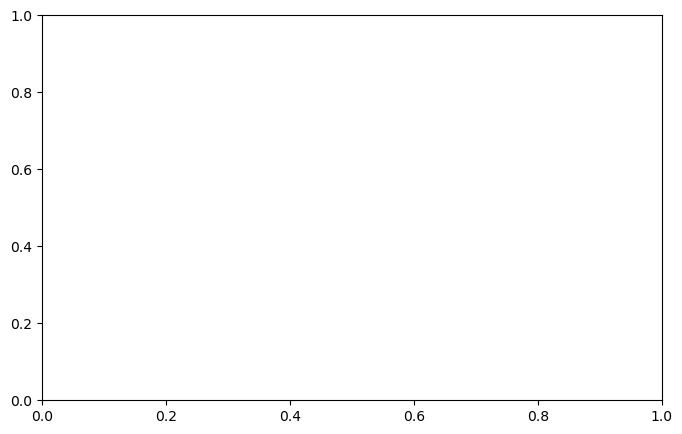

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

def get_decision_boundary_plot(X,y, model, degree ,ax=axes):
    # adding extra -.5 top each side of axis for better viz.
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # creating coordinate points for x-axis and y-axis and storing them in xx and yy
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # using ploynomial kernal to make prediciton for each data points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plotting the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k')
    
    ax.set_title(f'Degree={degree}')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    
    plt.tight_layout()
    plt.show()


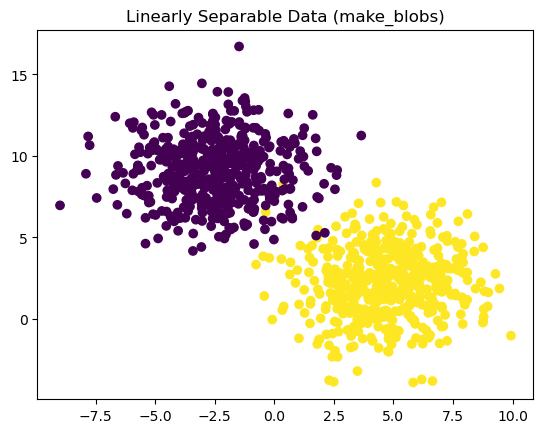

In [12]:
X, y = make_blobs(n_samples=1000, 
                  centers=2, 
                  n_features=2, 
                  cluster_std=2, 
                  random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Linearly Separable Data (make_blobs)")
plt.show()

In [41]:
X_test, y_test = make_blobs(n_samples=200, 
                  centers=2, 
                  n_features=2, 
                  cluster_std=2, 
                  random_state=42)

In [42]:
svm_linear_clf = make_pipeline(StandardScaler(), LinearSVC())

In [43]:
svm_linear_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

In [44]:
y_pred = svm_linear_clf.predict(X)
accuracy_score(y, y_pred)*100

99.6

In [45]:
y_pred_test = svm_linear_clf.predict(X_test)
accuracy_score(y_test, y_pred_test)*100

100.0

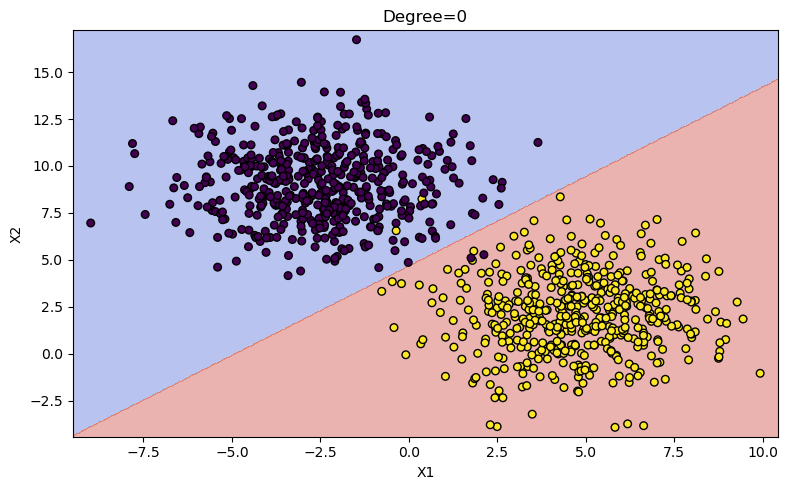

In [46]:
plt.close('all')
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
get_decision_boundary_plot(X,y,svm_linear_clf, 0, axes)
plt.show()

In [25]:
svc_clf = make_pipeline(StandardScaler(), SVC(kernel='linear'))

In [26]:
svc_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [33]:
y_pred = svc_clf.predict(X)

In [35]:
accuracy_score(y, y_pred) * 100

99.6

In [47]:
y_pred_test = svc_clf.predict(X_test)
accuracy_score(y_test, y_pred_test)*100

100.0

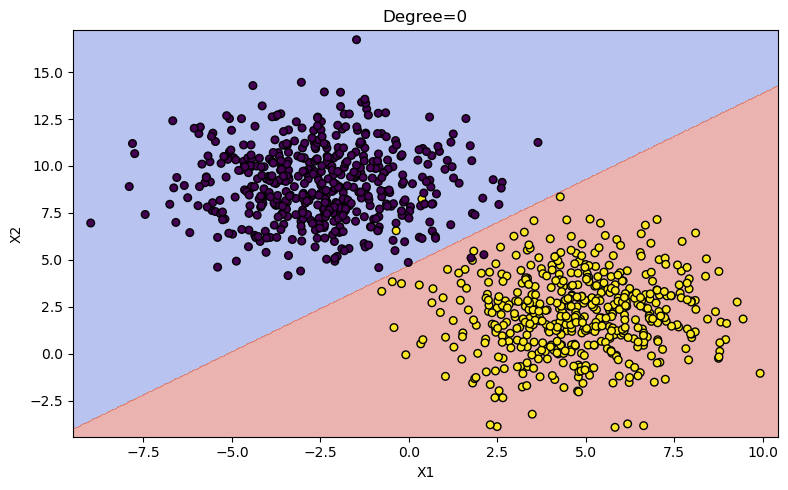

In [27]:
plt.close('all')
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
get_decision_boundary_plot(X,y,svc_clf, 0, axes)
plt.show()

In [28]:
sgd_clf = make_pipeline(StandardScaler(), SGDClassifier())

In [29]:
sgd_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [36]:
y_pred = sgd_clf.predict(X)

In [37]:
accuracy_score(y, y_pred)*100

99.5

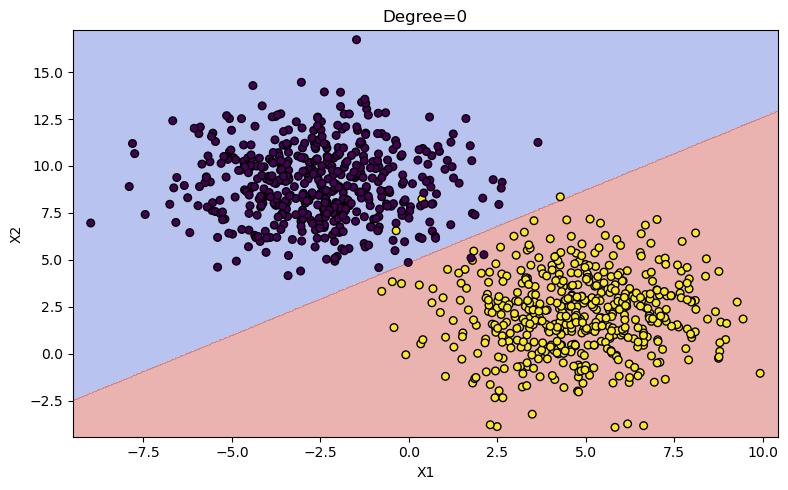

In [31]:
plt.close('all')
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
get_decision_boundary_plot(X,y,sgd_clf, 0, axes)
plt.show()

The accuracy is somewhat similar

## 10. Wine Testing Dataset

In [112]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score

In [97]:
import seaborn as sns

In [98]:
wine = load_wine(as_frame=True)

In [99]:
dfx, dfy = wine.data, wine.target

In [100]:
dfx

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [101]:
# no nulls
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [102]:
dfx.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


1. features have different scales.

<Axes: xlabel='alcohol', ylabel='Count'>

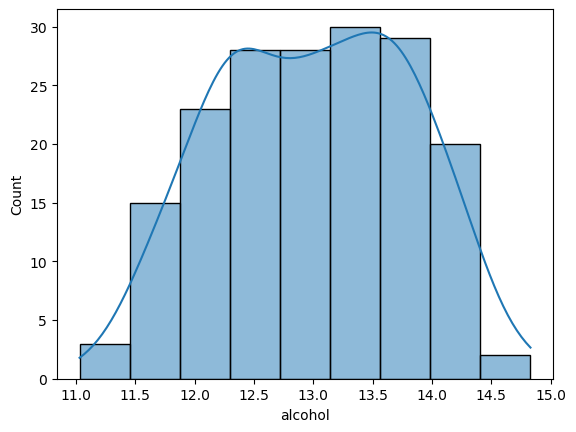

In [103]:
sns.histplot(data=dfx, x='alcohol', kde=True)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [107]:
X_train, X_test, y_train, y_test = [ x.to_numpy() for x in train_test_split(dfx,dfy, test_size=0.2, random_state=42)]

In [109]:
linear_svm_clf = make_pipeline(StandardScaler(), LinearSVC(random_state=42, max_iter=1000))

In [110]:
linear_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42))])

In [114]:
cross_val_score(linear_svm_clf, X_train, y_train, scoring="accuracy").mean()

0.9650246305418719

## let us see, how kernalised svm does

In [125]:
poly_kernel_svm = make_pipeline(StandardScaler(), SVC(kernel="poly", random_state=42))
rbf_kernel_svm = make_pipeline(StandardScaler(), SVC(kernel="rbf",random_state=42))

In [126]:
cross_val_score(poly_kernel_svm, X_train, y_train, scoring="accuracy").mean()

0.9155172413793103

In [127]:
cross_val_score(rbf_kernel_svm, X_train, y_train, scoring="accuracy").mean()

0.97192118226601

RBF kernel does better than poly. Let us do hyper-parameter tuning for rbf kernel.

In [129]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

In [130]:
params_dist = {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1,10),
}

In [132]:
rand_search = RandomizedSearchCV(rbf_kernel_svm, params_dist, n_iter=100, cv=5, random_state=42 )

In [133]:
rand_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svc', SVC(random_state=42))]),
                   n_iter=100,
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x31ce19570>,
                                        'svc__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x31ce183d0>},
                   random_state=42)

In [134]:
rand_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=2.560186404424365, gamma=0.002051110418843397,
                     random_state=42))])

In [135]:
rand_search.best_score_

0.9857142857142858

In [136]:
rand_search.score(X_test, y_test)

1.0